In [2]:
import numpy as np
import matplotlib.pyplot as plt
def basic_figure_style():
    SMALL_SIZE = 6*2                                    
    MEDIUM_SIZE = 8*2
    BIGGER_SIZE = 10*2

    plt.rc('font', size=MEDIUM_SIZE, family='serif')          # controls default text sizes
    plt.rc('axes', titlesize=MEDIUM_SIZE)                     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)                    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE, direction='out')    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE, direction='out')    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)                    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)                  # fontsize of the figure title
    plt.rc('lines', linewidth=2) 
    plt.rc('axes', grid=True) #
    plt.rc('grid', alpha=0.7) #
    plt.rc('xtick', top=True)
    plt.rc('ytick', right=True)
    plt.rc('axes.formatter', use_mathtext=True, min_exponent=4, useoffset=False)


    # plt.rc('figure', figsize='8, 6')                         # size of the figure, used to be '4, 3' in inches
    ######################################################
basic_figure_style()
cb = ['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#fbafe4', '#949494', '#ece133', '#56b4e9']



In [17]:
# average temperature profile in Burns 2010
def Burns_T_profile(r200, r):
    """
    This function calculate temperature profile in Burns 2010
    
    Parameters
    --------------
    
    r200: float

    r: np.array
        radius of extracting temperature
    
    """

    Tmid = 1.74 * (1 + 0.64 * (r/r200))**(-3.2)
    Tmin = 1.71 * (1 + 0.65 * (r/r200))**(-3.6)
    Tmax = 1.77 * (1 + 0.63 * (r/r200))**(-2.8)

    return Tmid, Tmin, Tmax

In [15]:
r200_A222 = 6.18 # arcmin
r200_A223 = 7.49 # arcmin

# # T_avg: float # keV
# #         Xray weighted temperature of 0.2-1 r200
#     # Tavg from fitting annlus
# a222_Tavg = 4.07
# a223_Tavg = 5.06

#Durret 2010 https://arxiv.org/pdf/1005.3295.pdf
a222_Tavg = 3.77
a223_Tavg = 4.38
r_a222 = np.array([0, 1, 2.5, 3.5, 5, 7])
r_a223 = np.array([0, 1, 2, 3, 5.5, 8])
annu_a222 = np.diff(r_a222)/2
annu_a223 = np.diff(r_a223)/2

r = np.arange(0.2,9.0,0.2)
rs = {'A222':[r_a222[:-1]+annu_a222, annu_a222, r200_A222], 'A223':[r_a223[:-1]+annu_a223, annu_a223, r200_A223]}

230315

/var/folders/sy/vxhnb6x11wz6mkt7x_sw_y140000gn/T/ipykernel_41252/1255653190.py:81: RuntimeWarning: divide by zero encountered in power
  axs[0].plot(np.arange(0,10), 5*np.arange(0,10)**(-0.45), color = cb[-3])
/var/folders/sy/vxhnb6x11wz6mkt7x_sw_y140000gn/T/ipykernel_41252/1255653190.py:82: RuntimeWarning: divide by zero encountered in power
  axs[1].plot(np.arange(0,10), 0.3*np.power(np.arange(0,10),-2.0), color = cb[-3])


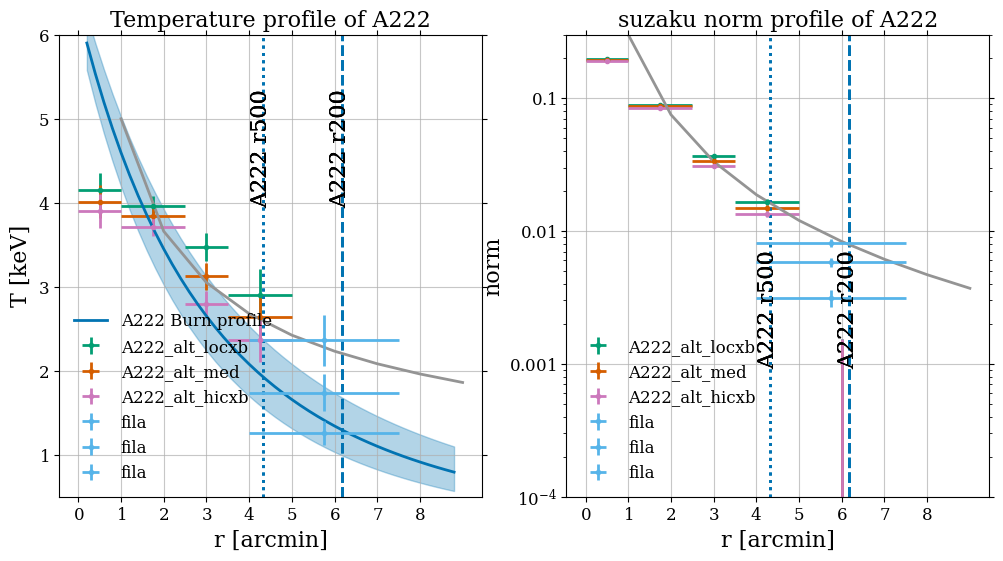

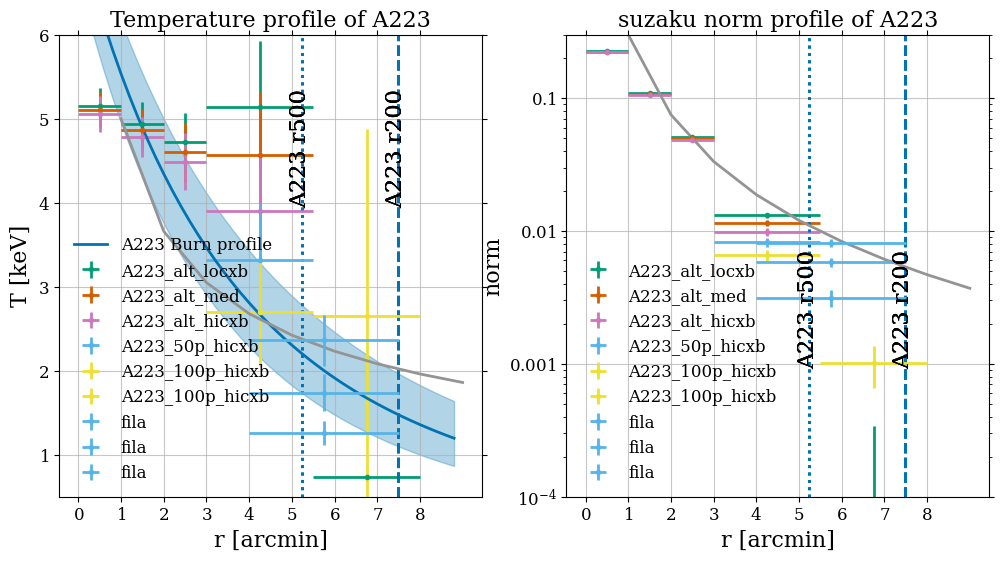

In [19]:
# 230315

'''
basic flux is always: 
cosmicvariance(< 6e-15) + pointsource(itself and scattering, >6e-15) 
+/- sqrt(1 sigma cosmic variance^2 + 1sigma pointsource err^2)
cosmic variance is always from altered logN-S. 

med: cosmicvariance(< 6e-15) + pointsource(itself and scattering, >6e-15) 
hicxb: + sqrt(1 sigma cosmic variance^2 + 1sigma pointsource err^2)
locxb: - sqrt(1 sigma cosmic variance^2 + 1sigma pointsource err^2)

alt: original flux
15p: consider point source flux is 15% larger or smaller, corresponding alter point source flux and flux err
20p: consider point source flux is 20% larger or smaller, corresponding alter point source flux and flux err
30p: consider point source flux is 30% larger or smaller, corresponding alter point source flux and flux err
50p: consider point source flux is 50% larger or smaller, corresponding alter point source flux and flux err
'''


inputpath = '/Users/eusracenorth/Documents/suzaku_A222-223/suzaku_data/spectras/spectras_230307/fit_spec_bins/logs'



for i in [2,3]:
    
    fig, axs = plt.subplots(1,2, figsize = (12, 6))
    Tavg = 0.
    Tavg_err = 0.
    n = 2
    for type in ['locxb', 'med', 'hicxb']:
        file = open(f'{inputpath}/sum_A22{i}_{type}.log')
        lines = file.readlines()
        temp = np.zeros(5)
        temp_err = np.zeros(5)
        dens = np.zeros(5)
        dens_err = np.zeros(5)
        j = 0
        for k, line in enumerate(lines):
            if 'kT' in line:
                temp[j] = float(line.split('keV')[-1].split('+/-')[0])
                temp_err[j] = float(line.split('keV')[-1].split('+/-')[-1].split()[0])
                dens[j] = float(lines[k+1].split('norm')[-1].split('+/-')[0])
                dens_err[j] = float(lines[k+1].split('norm')[-1].split('+/-')[-1].split()[0])
                j += 1
            else:
                continue
        temp[temp>7] = np.nan
        temp_err[temp_err>10] = np.nan
        dens[dens>1] = np.nan
        dens_err[dens_err>1] = np.nan
        axs[0].errorbar(rs[f'A22{i}'][0], temp, yerr = temp_err, xerr = rs[f'A22{i}'][1], label = f'A22{i}_alt_{type}', color = cb[n], fmt = '.')
        axs[1].errorbar(rs[f'A22{i}'][0], dens, yerr = dens_err, xerr = rs[f'A22{i}'][1], label = f'A22{i}_alt_{type}', color = cb[n], fmt = '.')
        axs[0].set_title(f'Temperature profile of A22{i}')
        axs[1].set_title(f'suzaku norm profile of A22{i}')
        
        axs[0].set_ylim(0.5,6)
        axs[1].set_ylim(1e-4,0.3)
        n+=1
        ylst = [4, 0.001]
        # plot burns profile
        Tavg = max(Tavg,np.nanmean(temp))
        Tavg_err = max(Tavg_err, np.sqrt(np.sum(temp_err[np.isfinite(temp_err)]**2))/4)
        
        for l, ax in enumerate(axs):
            ax.axvline(rs[f'A22{i}'][2], color = cb[0], linestyle = '--')
            ax.text(rs[f'A22{i}'][2]-0.3, ylst[l], f'A22{i} r200', rotation=90)
            ax.axvline(rs[f'A22{i}'][2]*0.7, color = cb[0], linestyle = 'dotted')
            ax.text(rs[f'A22{i}'][2]*0.7-0.3, ylst[l], f'A22{i} r500', rotation=90)
    if i==3:
            axs[0].errorbar(rs[f'A22{i}'][0][-2], 3.32, yerr = 0.67, xerr = rs[f'A22{i}'][1][-2], fmt='.', color = cb[-1], label = f'A22{i}_50p_hicxb')
            axs[1].errorbar(rs[f'A22{i}'][0][-2], 8.23e-3, yerr = 6.28e-4, xerr = rs[f'A22{i}'][1][-2], fmt='.', color = cb[-1], label = f'A22{i}_50p_hicxb')
            axs[0].errorbar(rs[f'A22{i}'][0][-2], 2.70, yerr = 0.64, xerr = rs[f'A22{i}'][1][-2], fmt='.', color = cb[-2], label = f'A22{i}_100p_hicxb')
            axs[1].errorbar(rs[f'A22{i}'][0][-2], 6.60e-3, yerr = 6.26e-4, xerr = rs[f'A22{i}'][1][-2], fmt='.', color = cb[-2], label = f'A22{i}_100p_hicxb')
            axs[0].errorbar(rs[f'A22{i}'][0][-1], 2.65, yerr =2.23, xerr = rs[f'A22{i}'][1][-1], fmt='.', color = cb[-2], label = f'A22{i}_100p_hicxb')
            axs[1].errorbar(rs[f'A22{i}'][0][-1], 1.01e-3, yerr = 3.49e-4, xerr = rs[f'A22{i}'][1][-1], fmt='.', color = cb[-2], label = f'A22{i}_100p_hicxb')

    Tmid, Tmin, Tmax = Burns_T_profile(rs[f'A22{i}'][2], r)
    Tmid, = axs[0].plot(r, Tmid*Tavg, color = cb[0], label = f'A22{i} Burn profile')
    Terr = axs[0].fill_between(r, Tmin*(Tavg-Tavg_err), Tmax*(Tavg+Tavg_err), color = cb[0], alpha=0.3)
    axs[0].plot(np.arange(0,10), 5*np.arange(0,10)**(-0.45), color = cb[-3])
    axs[1].plot(np.arange(0,10), 0.3*np.power(np.arange(0,10),-2.0), color = cb[-3])
    axs[1].set_yscale('log')
    # plot fila box
    temp = [1.74, 1.26, 2.36]
    temp_err = [0.221, 0.141, 0.308]
    dens = [5.81e-3, 3.13e-3, 8.14e-3]
    dens_err = [4.69e-4, 4.66e-4, 5.08e-4]
    for i in range(3):
        axs[0].errorbar((4+7.5)/2, temp[i], yerr = temp_err[i], xerr = (7.5-4)/2, label = f'fila', color = cb[-1], fmt = '.')
        axs[1].errorbar((4+7.5)/2, dens[i], yerr = dens_err[i], xerr = (7.5-4)/2, label = f'fila', color = cb[-1], fmt = '.')
    ylab = ['T [keV]', 'norm']
    for l, ax in enumerate(axs):
        ax.set_xlabel('r [arcmin]')
        ax.set_ylabel(ylab[l])
        ax.legend(loc = 'lower left', frameon=False)
        ax.set_xticks(np.arange(9))
    plt.show()

230319

In [24]:
datapath = '/Users/eusracenorth/Documents/suzaku_A222-223/profile_230302/xissim/230319'
savepath = '/Users/eusracenorth/Documents/suzaku_A222-223/suzaku_data/spectras/spectras_230317/sum_tables'
f = open(f'{datapath}/logs/T_n.logs')
lines = f.readlines()
i =0
Ts = np.zeros(3*3*2+3)
Terr = np.zeros(3*3*2+3)
ns = np.zeros(3*3*2+3)
nerr = np.zeros(3*3*2+3)
for j, line in enumerate(lines):
    if 'kT' in line:   
        Ts[i] =  float(line.split('keV')[-1].split('+/-')[0])
        Terr[i] =  float(line.split('keV')[-1].split('+/-')[-1] )
        ns[i] =  float(lines[j+1].split('norm')[-1].split('+/-')[0])
        nerr[i] =  float(lines[j+1].split('norm')[-1].split('+/-')[-1])
        i +=1
f.close()
print(Ts)
for k, i in enumerate([2,3]):
    newf = open(f'{savepath}/a22{i}_const_apec_all.csv', 'w')
    newf.write(f'region,T,Terr,n,nerr,Tlo,Tloerr,nlo,nloerr,Thi,Thierr,nhi,nhierr\n')
    for j, region in enumerate([f'annu_A22{i}_1', f'annu_A22{i}_2', f'annu_A22{i}_3']):
        newf.write(f'{region}, {Ts[k*9+j*3]}, {Terr[k*9+j*3]}, {ns[k*9+j*3]}, {nerr[k*9+j*3]},\
{Ts[k*9+j*3+1]}, {Terr[k*9+j*3+1]}, {ns[k*9+j*3+1]}, {nerr[k*9+j*3+1]},\
{Ts[k*9+j*3+2]}, {Terr[k*9+j*3+2]}, {ns[k*9+j*3+2]}, {nerr[k*9+j*3+2]}\n')
newf.close()

[4.09226 3.93948 4.24416 3.81873 3.72045 3.91532 3.2933  2.73635 3.85997
 4.50526 4.29262 4.71447 3.46765 3.10807 3.83991 2.61706 2.04524 3.27386
 1.74002 1.25878 2.35501]


/var/folders/sy/vxhnb6x11wz6mkt7x_sw_y140000gn/T/ipykernel_87416/2943364208.py:40: RuntimeWarning: divide by zero encountered in power
  axs[0].plot(np.arange(0,10), 5*np.arange(0,10)**(-0.45), color = cb[-3], label = '$T\propto r^{-0.45}$')
/var/folders/sy/vxhnb6x11wz6mkt7x_sw_y140000gn/T/ipykernel_87416/2943364208.py:41: RuntimeWarning: divide by zero encountered in power
  axs[1].plot(np.arange(0,10), 0.3*np.power(np.arange(0,10),-2.0), color = cb[-3], label = '$n\propto r^{-2}$')


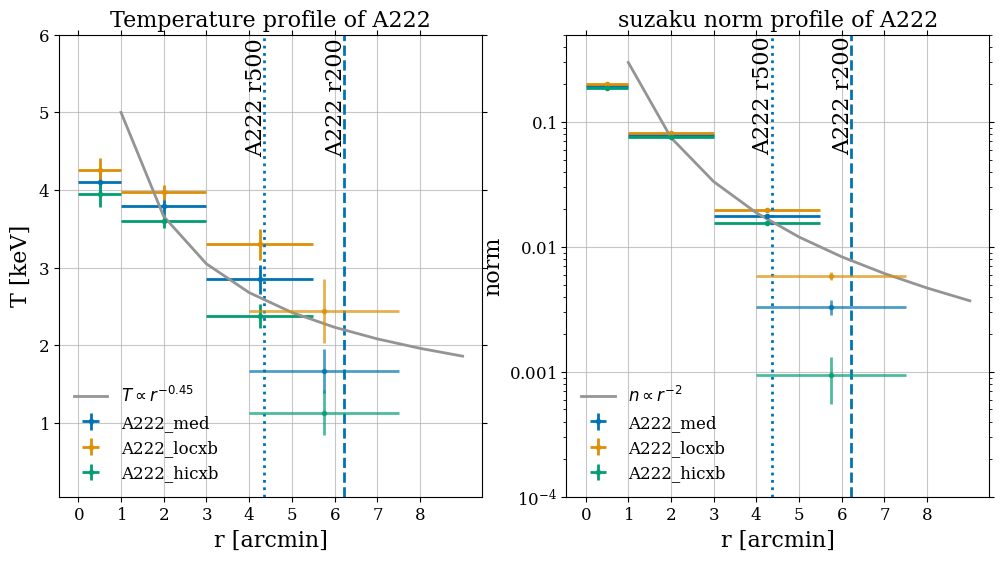

/var/folders/sy/vxhnb6x11wz6mkt7x_sw_y140000gn/T/ipykernel_87416/2943364208.py:40: RuntimeWarning: divide by zero encountered in power
  axs[0].plot(np.arange(0,10), 5*np.arange(0,10)**(-0.45), color = cb[-3], label = '$T\propto r^{-0.45}$')
/var/folders/sy/vxhnb6x11wz6mkt7x_sw_y140000gn/T/ipykernel_87416/2943364208.py:41: RuntimeWarning: divide by zero encountered in power
  axs[1].plot(np.arange(0,10), 0.3*np.power(np.arange(0,10),-2.0), color = cb[-3], label = '$n\propto r^{-2}$')


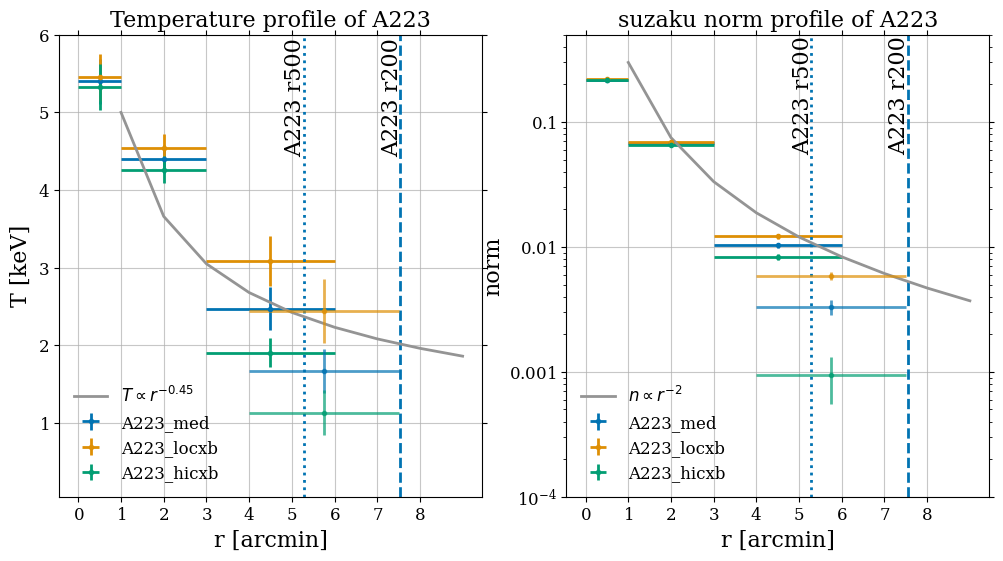

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
r200_A222 = 6.225 # arcmin
r200_A223 = 7.54 # arcmin
r_a222 = np.array([0, 1, 3, 5.5])
r_a223 = np.array([0, 1, 3, 6])
annu_a222 = np.diff(r_a222)/2
annu_a223 = np.diff(r_a223)/2

r = np.arange(0.2,9.0,0.2)
rs = {'A222':[r_a222[:-1]+annu_a222, annu_a222, r200_A222], 'A223':[r_a223[:-1]+annu_a223, annu_a223, r200_A223]}
savepath = '/Users/eusracenorth/Documents/suzaku_A222-223/suzaku_data/spectras/spectras_230406'
dat_idx = {'med':['T', 'Terr', 'n', 'nerr'], 'hicxb':['Tlo', 'Tloerr', 'nlo', 'nloerr'], 'locxb':['Thi', 'Thierr', 'nhi', 'nhierr']}
for k, i in enumerate([2,3]):
    df = pd.read_csv(f'{savepath}/a22{i}_T_n.csv')
    fig, axs = plt.subplots(1,2, figsize = (12, 6))
    n = 0
    for type in ['med', 'locxb', 'hicxb']:   
        temp = df[dat_idx[type][0]]
        temp_err = df[dat_idx[type][1]]
        dens = df[dat_idx[type][2]]
        dens_err = df[dat_idx[type][3]]
        axs[0].errorbar(rs[f'A22{i}'][0], temp, yerr = temp_err, xerr = rs[f'A22{i}'][1], label = f'A22{i}_{type}', color = cb[n], fmt = '.')
        axs[1].errorbar(rs[f'A22{i}'][0], dens, yerr = dens_err, xerr = rs[f'A22{i}'][1], label = f'A22{i}_{type}', color = cb[n], fmt = '.')
        axs[0].set_title(f'Temperature profile of A22{i}')
        axs[1].set_title(f'suzaku norm profile of A22{i}')
        axs[0].set_ylim(0.05,6)
        axs[1].set_ylim(1e-4,0.5)
        ylst = [4.5, 0.06]
        n +=1

    
    for l, ax in enumerate(axs):
        ax.axvline(rs[f'A22{i}'][2], color = cb[0], linestyle = '--')
        ax.text(rs[f'A22{i}'][2]-0.45, ylst[l], f'A22{i} r200', rotation=90)
        ax.axvline(rs[f'A22{i}'][2]*0.7, color = cb[0], linestyle = 'dotted')
        ax.text(rs[f'A22{i}'][2]*0.7-0.45, ylst[l], f'A22{i} r500', rotation=90)

    axs[0].plot(np.arange(0,10), 5*np.arange(0,10)**(-0.45), color = cb[-3], label = '$T\propto r^{-0.45}$')
    axs[1].plot(np.arange(0,10), 0.3*np.power(np.arange(0,10),-2.0), color = cb[-3], label = '$n\propto r^{-2}$')
    # plot fila reg 230317
    temp = [1.74, 1.26, 2.36]
    temp_err = [0.221, 0.141, 0.308]
    dens = [5.81e-3, 3.13e-3, 8.14e-3]
    dens_err = [4.69e-4, 4.66e-4, 5.08e-4]
    ## filabox 230407
    temp1 = [1.67, 1.13, 2.44]
    temp1_err = [0.28, 0.29, 0.41]
    dens1 = [3.32e-3, 9.36e-4, 5.86e-3]
    dens1_err = [4.69e-4, 3.83e-4, 4.73e-4]
    ## filabox 230412
    temp2 = [1.78, 1.24, 2.56]
    temp2_err = [0.27, 0.25, 0.41]
    dens2 = [3.01e-3, 1.08e-3, 4.91e-3]
    dens2_err = [3.39e-4, 3.25e-4, 3.49e-4]
    # # plot werner fila reg
    # temp1 = [3.02, 1.96, 4.50]
    # temp1_err = [0.741, 0.57, 0.95]
    # dens1 = [5.59e-3, 3.40e-3, 7.54e-3]
    # dens1_err = [6.33e-4, 5.96e-4, 5.92e-4]
    
    # axs[0].errorbar((4+7.5)/2, temp[i], yerr = temp_err[i], xerr = (7.5-4)/2, label = f'fila box 230317',alpha = 0.7, color = cb[-2], fmt = '.')
    # axs[1].errorbar((4+7.5)/2, dens[i], yerr = dens_err[i], xerr = (7.5-4)/2, label = f'fila box 230317', alpha = 0.7,color = cb[-2], fmt = '.')
    axs[0].errorbar((4+7.5)/2, temp1[0], yerr = temp1_err[0], xerr = (7.5-4)/2, alpha = 0.7, color = cb[0], fmt = '.') #label = f'fila box 230407',
    axs[1].errorbar((4+7.5)/2, dens1[0], yerr = dens1_err[0], xerr = (7.5-4)/2, alpha = 0.7, color = cb[0], fmt = '.')#label = f'fila box 230407',
    # axs[0].errorbar((4+7.5)/2, temp2[i], yerr = temp2_err[i], xerr = (7.5-4)/2, label = f'fila box 230412', alpha = 0.7,color = cb[-3], fmt = '.')
    # axs[1].errorbar((4+7.5)/2, dens2[i], yerr = dens2_err[i], xerr = (7.5-4)/2, label = f'fila box 230412', alpha = 0.7, color = cb[-3], fmt = '.')

    # axs[0].errorbar((4+7.5)/2, temp[i], yerr = temp_err[i], xerr = (7.5-4)/2,alpha = 0.7,  color = cb[-2], fmt = '.')
    # axs[1].errorbar((4+7.5)/2, dens[i], yerr = dens_err[i], xerr = (7.5-4)/2, alpha = 0.7, color = cb[-2], fmt = '.')
    axs[0].errorbar((4+7.5)/2, temp1[1], yerr = temp1_err[1], xerr = (7.5-4)/2,  alpha = 0.7,color = cb[2], fmt = '.')
    axs[1].errorbar((4+7.5)/2, dens1[1], yerr = dens1_err[1], xerr = (7.5-4)/2, alpha = 0.7, color = cb[2], fmt = '.')
    axs[0].errorbar((4+7.5)/2, temp1[2], yerr = temp1_err[2], xerr = (7.5-4)/2,  alpha = 0.7,color = cb[1], fmt = '.')
    axs[1].errorbar((4+7.5)/2, dens1[2], yerr = dens1_err[2], xerr = (7.5-4)/2, alpha = 0.7, color = cb[1], fmt = '.')
    # axs[0].errorbar((4+7.5)/2, temp2[i], yerr = temp2_err[i], xerr = (7.5-4)/2,  alpha = 0.7,color = cb[-3], fmt = '.')
    # axs[1].errorbar((4+7.5)/2, dens2[i], yerr = dens2_err[i], xerr = (7.5-4)/2,  alpha = 0.7, color = cb[-3], fmt = '.')
    axs[1].set_yscale('log')
    ylab = ['T [keV]', 'norm']
    for l, ax in enumerate(axs):
        ax.set_xlabel('r [arcmin]')
        ax.set_ylabel(ylab[l])
        ax.legend(loc = 'lower left', frameon=False)
        ax.set_xticks(np.arange(9))
    plt.show()

Temperature data

In [ ]:
##### fitting T from suzaku
## previous
# a222_Tavg = 4.32401 # fit from suzaku
# a223_Tavg = 4.85325 # fit from suzaku
# annu_a223 = np.array([0, 30, 56.667, 83.333, 110, 136.667, 163.333, 210, 270, 360, 450])/2/60/r200_A222 # arcmin
# annu_a222 = np.array([0, 30, 55.714, 81.429, 107.143, 132.857, 158.571, 184.286, 210, 270, 330, 408, 480])/2/60/r200_A223
# a222_T = np.array([5.35312, 4.64902, 4.46047, 4.49165, 4.38939, 3.95036, 4.02843, 4.22005, 3.65026, 3.98659, 5.34162, 5.16214])
# a222_Terr = np.array([0.387256, 0.210179, 0.186115, 0.195890, 0.202039, 0.185476, 0.215657, 0.228786, 0.310818, 0.362760, 0.678487, 0.879745])
# a223_T = np.array([5.19289, 5.31805, 5.51535, 5.37649, 5.30783, 4.94707, 4.20149, 5.20012, 4.74495, 4.00661])
# a223_Terr = np.array([0.375693, 0.276931, 0.289289, 0.281860, 0.303147, 0.361606, 0.239831, 0.472120, 0.503042, 0.487798])

# ## 221012 wrong unrel cxb
# annu_a222 = np.array([0, 1, 2.5, 3.5, 5])/2
# annu_a223 = np.array([0, 1, 2, 3, 5.5])/2
# a222_T = np.array([4.74, 4.5, 4.33, 5.02])
# a222_Terr = np.array([0.22, 0.12, 0.21, 0.57])
# a223_T = np.array([5.48, 5.3, 5.46, 6.74])
# a223_Terr = np.array([0.25, 0.23, 0.31, 1.05])

# # ## 221012 afternoon
# annu_a222 = np.array([0, 1, 2.5, 3.5, 5, 7])/2
# annu_a223 = np.array([0, 1, 2, 3, 5.5, 8])/2
# a222_T = np.array([4.65, 4.29, 3.89, 3.71,  6.33 ])
# a222_Terr = np.array([0.22, 0.11, 0.18, 0.32,  2.02])
# a223_T = np.array([5.37, 5.01, 4.93, 4.33, 2.18])
# a223_Terr = np.array([0.23, 0.2, 0.26, 0.46, 0.73])

# ## 221014 
# annu_a222 = np.array([0, 1, 2.5, 3.5, 5, 7])/2
# annu_a223 = np.array([0, 1, 2, 3, 5.5, 8])/2
# a222_T = np.array([4.65, 4.14, 3.61, 2.99,  3.15 ])
# a222_Terr = np.array([0.22, 0.11, 0.16, 0.28,  1.43])
# a223_T = np.array([5.36, 4.88, 4.64, 3.41, 1.4])
# a223_Terr = np.array([0.23, 0.2, 0.24, 0.38, 1.2])
# r_a222 = (annu_a222[1::]+annu_a222[0:-1])
# r_a223 = (annu_a223[1::]+annu_a223[0:-1])
# rwidth_a223 = (annu_a223[1::]-annu_a223[0:-1])
# rwidth_a222 = (annu_a222[1::]-annu_a222[0:-1])
## 221123
annu_a222 = np.array([0, 1, 2.5, 3.5, 5])
annu_a223 = np.array([1, 2, 3, 8])
a222_T = np.array([4.61, 4.33, 4.15, 3.73])
a222_Terr = np.array([0.217, 0.116, 0.181, 0.315])
a223_T = np.array([5.43, 5.43, 5.07, 2.26])
a223_Terr = np.array([0.239, 0.225, 0.275, 1.160])
r_a222 = (annu_a222[1::]+annu_a222[0:-1])/2
r_a223 = np.array([0.5, 1.5, 2.5, 6.75])
rwidth_a223 = abs(annu_a223-r_a223)
rwidth_a222 = (annu_a222[1::]-annu_a222[0:-1])
# #Durret 2010 https://arxiv.org/pdf/1005.3295.pdf
# a222_Tavg = 3.77
# a223_Tavg = 4.38
# # Werner 2008 
# a222_Tavg = 4.43
# a223_Tavg = 5.31
# Tavg from fitting annlus
a222_Tavg = 4.07
a223_Tavg = 5.06

# 230315
# # for alt med
# a222_T_alt_med = np.array([4.05, 3.92, 3.28, 2.92])
# a222_Terr_alt_med = np.array([0.20, 0.11, 0.035, 0.016])
# a223_T_alt_med = np.array([5.13, 4.94, 4.73, 4.56])
# a223_Terr_alt_med = np.array([0.221, 0.11, 0.35, 0.750])

In [ ]:
(5.2+1.58)/2 # A222
(6.28+1.89)/2 # A223

In [ ]:
4.1/5.31*7.1
3.4/4.43*4.4